In [1]:
import numpy as np
from tensorflow.keras.utils import plot_model

from cordex_discrete import cordex_discrete
from cordex_continuous import cordex_continuous
from plot_fun import subplot_results
from Jcb import calc_basis_matrix, Jcb

from autoencoder import create_train_val_set, create_autoencoder, create_autoencoder_enhanced, fit_autoencoder, fit_denoising_autoencoder, plot_history

from latent_bo import objective_function, latent_auto_bo, latent_manual_bo, plot_convergence, plot_obj, plot_evals

## Settings

In [26]:
runs = 4
levels = np.linspace(-1,1,3).tolist()
optimality = 'A'
n_x = [100]
n_b = [2]
scalars = 0
J_cb = Jcb(*[calc_basis_matrix(x_basis=x, b_basis=b) for x, b in zip(n_x, n_b)])

In [27]:
des_train, des_val = create_train_val_set(runs=runs,
                                          n_x=n_x,
                                          scalars=scalars,
                                          optimality=optimality,
                                          J_cb=J_cb,
                                          num_designs=1_000,
                                          test_size=0.2,
                                          noise=None)

100%|██████████| 1000/1000 [01:14<00:00, 13.38it/s]


In [28]:
# des_pure_train, des_pure_val,\
# des_noisy_train, des_noisy_val = create_train_val_set(runs=runs,
#                                                       n_x=n_x,
#                                                       scalars=scalars,
#                                                       optimality=optimality,
#                                                       J_cb=J_cb,
#                                                       num_designs=1_000,
#                                                       test_size=0.2,
#                                                       noise=0.1)

## Autoencoders

Epoch 1/1000
25/25 [==============================] - 2s 14ms/step - loss: 0.5643 - val_loss: 0.5891
Epoch 2/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.4489 - val_loss: 0.5848
Epoch 3/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.4105 - val_loss: 0.5772
Epoch 4/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.3901 - val_loss: 0.5685
Epoch 5/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.3704 - val_loss: 0.5525
Epoch 6/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.3668 - val_loss: 0.5158
Epoch 7/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.3548 - val_loss: 0.4920
Epoch 8/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.3517 - val_loss: 0.4552
Epoch 9/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.3488 - val_loss: 0.4187
Epoch 10/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.3385 - val_loss: 0.391

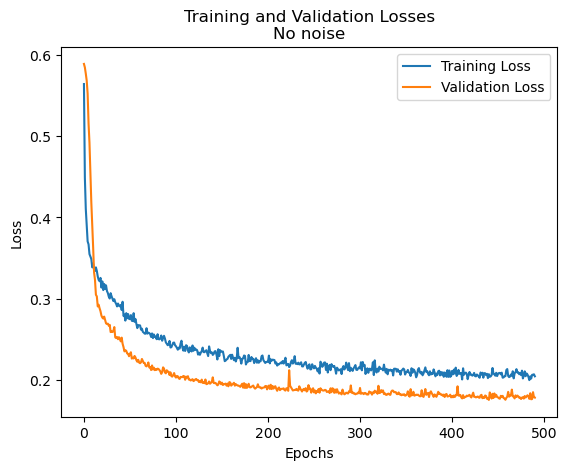

In [29]:
autoencoder_noiseless,\
encoder_noiseless, decoder_noiseless,\
history_noiseless = fit_autoencoder(autoencoder_func=create_autoencoder_enhanced,
                                    train_data=des_train, val_data=des_val,
                                    input_dim=des_train.shape[1], latent_dim=4)
plot_history(history_noiseless, title="No noise")

In [30]:
# autoencoder, _, _ = create_autoencoder_enhanced(input_dim=des_train.shape[1], latent_dim=4)
# plot_model(autoencoder, show_shapes=True, show_layer_names=True)
# autoencoder.save('autoencoder.h5')

## Latent BO

In [31]:
optimal_mat, optimal_cr, gp_result = latent_auto_bo(runs=runs,
                                                    n_x=n_x,
                                                    J_cb=J_cb,
                                                    decoder=decoder_noiseless,
                                                    latent_dim=4,
                                                    n_iterations=100,)

Iteration No: 1 started. Evaluating function at random point.
1/1 [==============================] - 0s 122ms/step
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.1525
Function value obtained: 12.4007
Current minimum: 12.4007
Iteration No: 2 started. Evaluating function at random point.
1/1 [==============================] - 0s 13ms/step
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.0306
Function value obtained: 20.3175
Current minimum: 12.4007
Iteration No: 3 started. Evaluating function at random point.
1/1 [==============================] - 0s 14ms/step
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.0422
Function value obtained: 17.1816
Current minimum: 12.4007
Iteration No: 4 started. Evaluating function at random point.
1/1 [==============================] - 0s 15ms/step
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.0351
Function value obtained: 12.2191
Current minimum: 12.2191
Iteration N

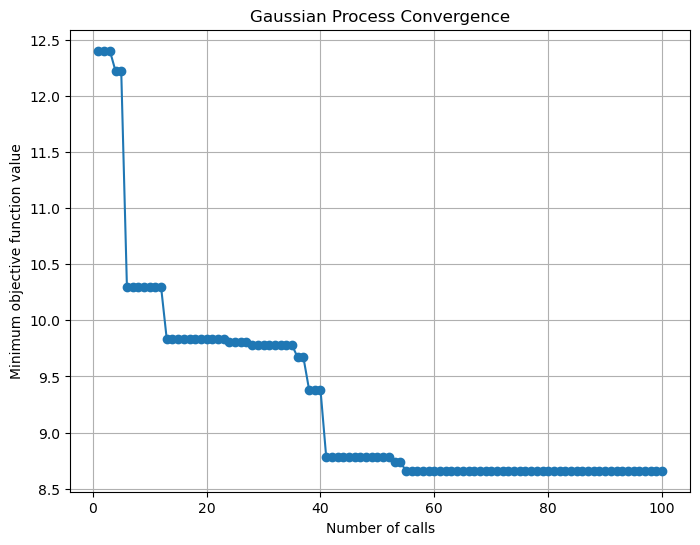

In [32]:
plot_convergence(gp_result, "Gaussian Process Convergence")

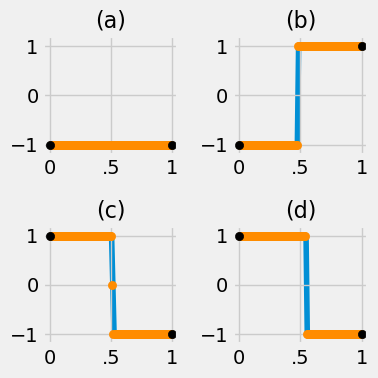

In [33]:
subplot_results(sub_x=2, sub_y=2, T=np.linspace(0,1,100), results=np.round(optimal_mat))

In [34]:
objective_function(np.round(optimal_mat), m=runs, n=sum(n_x), J_cb=J_cb)

8.658518303858253